**5 - 1.**

In [2]:
# tensorflow : 구글에서 만든 인공지능 도구

from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_input.shape

(60000, 28, 28)

In [4]:
test_input.shape

(10000, 28, 28)

In [5]:
train_target

'''
0: 티셔츠
1: 바지
2: 스웨터
3: 드레스
4: 코트
5: 샌달
6: 셔츠
7: 스니커즈
8: 가방
9: 앵클부츠
'''

'\n0: 티셔츠\n1: 바지\n2: 스웨터\n3: 드레스\n4: 코트\n5: 샌달\n6: 셔츠\n7: 스니커즈\n8: 가방\n9: 앵클부츠\n'

In [6]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
import numpy as np

np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [8]:
train_scaled = train_input.reshape(-1,784)/255
test_scaled = test_input.reshape(-1,784)/255

In [9]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [10]:
train_scaled.shape

(48000, 784)

In [11]:
val_scaled.shape

(12000, 784)

In [12]:
test_scaled.shape

(10000, 784)

In [13]:
# 비정형 데이터 : 딥러닝
# 1. 일반적인 머신러닝 (0.8479)
# 2. 인공신경망 (0.8688)
# 3. 인공신경망(은닉층):딥러닝
# 4. CNN을 사용했을 때 정확도

In [14]:
# 머신러닝 모델 실습

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_scaled, train_target)

model.score(test_scaled, test_target)

0.8479

In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

dense1 = keras.layers.Dense(100, activation='relu', input_shape=(784,))
drop1 = keras.layers.Dropout(0.3)
dense2 = keras.layers.Dense(10, activation='softmax')

# 오차 함수(다중 분류) : categorical_crossentropy
# 오차 함수(이중 분류) : binary_crossentropy

checkpoint = keras.callbacks.ModelCheckpoint('best.h5') # 가장 검증데이터 오차가 적은 모델 저장하는 함수
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # 에폭 5회 시도해도 좋아지지 않으면 학습 종료

model = keras.Sequential([dense1, drop1, dense2]) # 도화지
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

history = model.fit(train_scaled, train_target, epochs=100, validation_data=(val_scaled,val_target), callbacks=[checkpoint, early_stopping], batch_size=64) #2**n

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 0.6258 - accuracy: 0.7815 - val_loss: 0.4492 - val_accuracy: 0.8413
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4501 - accuracy: 0.8398 - val_loss: 0.3962 - val_accuracy: 0.8578
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.8521 - val_loss: 0.3798 - val_accuracy: 0.8612
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3909 - accuracy: 0.8578 - val_loss: 0.3539 - val_accuracy: 0.8721
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3700 - accuracy: 0.8670 - val_loss: 0.3486 - val_accuracy: 0.8765
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.8684 - val_loss: 0.3446 - val_accuracy: 0.8713
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3489 - accuracy: 0.8714 - val_loss: 0.3344 - val_accuracy: 0.8769

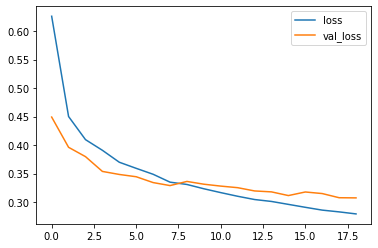

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][:-5])
plt.plot(history.history['val_loss'][:-5])
plt.legend(['loss','val_loss'])
plt.show()

In [17]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8797


[0.34456583857536316, 0.8797000050544739]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.save('my_model.h5')

In [20]:
model2 = keras.models.load_model('best.h5')

In [21]:
model2.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.3504 - accuracy: 0.8782


[0.35036158561706543, 0.8781999945640564]

**5 - 2.**

In [22]:
mnist = tf.keras.datasets.mnist

In [23]:
(train_input, train_target),(test_input, test_target) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [24]:
train_input.shape

(60000, 28, 28)

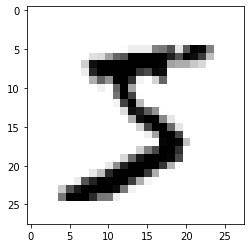

In [25]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [26]:
# 훈련데이터, 검증데이터, 시험데이터
# 데이터 표준화
# 인공신경망(은닉층 자유)
# 검증데이터 사용
# callback: early_stopping, checkpoint
# 최종 평가

mnist = tf.keras.datasets.mnist
(train_input, train_target), (test_input, test_target) = mnist.load_data()

train_scaled = train_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

dense1 = keras.layers.Dense(50, activation = 'relu', input_shape = (784,))
drop1 = keras.layers.Dropout(0.2)
dense2 = keras.layers.Dense(10, activation = 'softmax')

# 오차 함수(다중 분류) : categorical_crossentropy
# 오차 함수(이진 분류) : binary_crossentropy

checkpoint = keras.callbacks.ModelCheckpoint('best.h5') # 가장 검증 데이터 오차가 가장 적은 모델을 저장하는 함수
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # 5번 시도했는데도 좋아지지않으면 학습 끝낸다.

model = keras.Sequential([dense1, drop1, dense2]) # 도화지
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer='adam')

history = model.fit(train_scaled, train_target, epochs = 100, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early_stopping], batch_size=32)

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4317 - accuracy: 0.8741 - val_loss: 0.2134 - val_accuracy: 0.9377
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2352 - accuracy: 0.9314 - val_loss: 0.1683 - val_accuracy: 0.9492
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1946 - accuracy: 0.9419 - val_loss: 0.1420 - val_accuracy: 0.9569
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1696 - accuracy: 0.9481 - val_loss: 0.1278 - val_accuracy: 0.9613
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1525 - accuracy: 0.9530 - val_loss: 0.1180 - val_accuracy: 0.9657
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1376 - accuracy: 0.9571 - val_loss: 0.1114 - val_accuracy: 0.9677
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1276 - accuracy: 0.9609 - val_loss: 0.1077 - val_ac

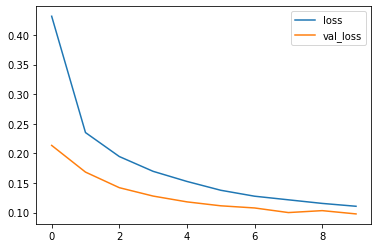

In [27]:
plt.plot(history.history['loss'][:-5])
plt.plot(history.history['val_loss'][:-5])
plt.legend(['loss', 'val_loss'])
plt.show()

In [28]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9694


[0.09926598519086838, 0.9693999886512756]

**5 - 3.**

In [29]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [30]:
train_input.shape   # CNN 쓰려면 4차원 (사진갯수, 가로, 세로, 색상)

(60000, 28, 28)

In [31]:
train_scaled = train_input.reshape(-1,28,28,1)/255
test_scaled = test_input.reshape(-1,28,28,1)/255

In [32]:
train_scaled.shape

(60000, 28, 28, 1)

In [33]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

Epoch 1/100
1500/1500 [==============================] - 59s 39ms/step - loss: 0.5307 - accuracy: 0.8112 - val_loss: 0.3348 - val_accuracy: 0.8762
Epoch 2/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3588 - accuracy: 0.8699 - val_loss: 0.2830 - val_accuracy: 0.8965
Epoch 3/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3060 - accuracy: 0.8897 - val_loss: 0.2602 - val_accuracy: 0.9018
Epoch 4/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2724 - accuracy: 0.9021 - val_loss: 0.2376 - val_accuracy: 0.9111
Epoch 5/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2467 - accuracy: 0.9092 - val_loss: 0.2348 - val_accuracy: 0.9147
Epoch 6/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2297 - accuracy: 0.9153 - val_loss: 0.2290 - val_accuracy: 0.9156
Epoch 7/100
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2103 - accuracy: 0.9223 - val_loss: 0

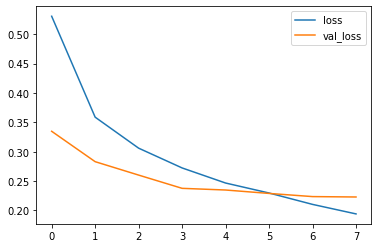

In [36]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential() # 도화지
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten()) # 사진을 1차원으로 쭉 늘려주는 함수
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5') # 가장 검증 데이터 오차가 가장 적은 모델을 저장하는 함수
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # 5번 시도했는데도 좋아지지않으면 학습 끝낸다.

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer='adam')

history = model.fit(train_scaled, train_target, epochs = 100, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early_stopping], batch_size=32)

plt.plot(history.history['loss'][:-5])
plt.plot(history.history['val_loss'][:-5])
plt.legend(['loss', 'val_loss'])
plt.show()

In [37]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2409 - accuracy: 0.9143


[0.2409161627292633, 0.9143000245094299]

In [38]:
print(test_scaled.shape, test_target.shape)

(10000, 28, 28, 1) (10000,)


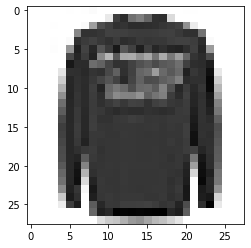

In [40]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [41]:
model.predict(val_scaled[0].reshape(1,28,28,1))

array([[3.94793082e-04, 6.24386098e-11, 6.67365640e-02, 1.86709565e-06,
        1.59776653e-03, 3.00165275e-12, 9.31256950e-01, 1.27849920e-13,
        1.19794495e-05, 3.23907307e-12]], dtype=float32)

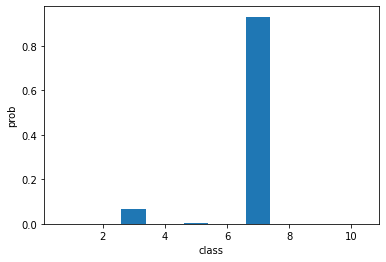

In [42]:
plt.bar(range(1,11), model.predict(val_scaled[0].reshape(1,28,28,1))[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [43]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']
classes[np.argmax(model.predict(val_scaled[0].reshape(1, 28, 28, 1)))]

'셔츠'

**5 - 4.**

In [44]:
from tensorflow.keras.datasets import imdb # 영화 리뷰데이터 // 긍부정

In [45]:
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words = 500) # 빈도순으로 가장 많이 사용된 단어 500개

17473536/17464789 [==============================] - 0s 0us/step


In [46]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [47]:
train_target

array([1, 0, 0, ..., 0, 1, 0])

In [48]:
len(train_input[0])

218

In [49]:
len(train_input[1])

189

In [50]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [51]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100) # 짧든 길든 잘라주는 함수 짧으면 0으로 채우고, 아니면 자르고
val_seq = pad_sequences(val_input, maxlen = 100)
test_seq = pad_sequences(test_input, maxlen = 100)

In [54]:
train_seq.shape

(20000, 100)

In [55]:
train_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   9,  51,
         2,   8,  30,   2,   2, 236, 206,  20, 159,  29,   2, 141,  35,
         2, 284,  45,  44,   6,   2,   2,  15, 215, 339,  27, 464, 103,
       112,   2,   2,  34,   2,  15, 181,  98,   8, 169, 289,   2,   2,
       278, 120,   2,   2,   2,  12,  47,  87, 206,   2,   2,   7, 129,
         2, 253,   5,   6,  87,  58,  33,   4, 102], dtype=int32)

In [56]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import imdb # 영화 리뷰 데이터 // 긍정, 부정
from tensorflow.keras.preprocessing.sequence import pad_sequences

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 빈도순으로 가장 많이 사용된 단어 500개
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

train_seq = pad_sequences(train_input, maxlen = 100) # 짧든 길든 잘라주는 함수 짧으면 0으로 채우고, 아니면 자르고
val_seq = pad_sequences(val_input, maxlen = 100)
test_seq = pad_sequences(test_input, maxlen = 100)

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
test_oh = keras.utils.to_categorical(test_seq)

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5') # 가장 검증 데이터 오차가 가장 적은 모델을 저장하는 함수
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # 5번 시도했는데도 좋아지지않으면 학습 끝낸다.

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics='accuracy')

history = model.fit(train_oh, train_target, epochs = 100, validation_data=(val_oh, val_target), callbacks=[early_stopping, checkpoint])

Epoch 1/100
625/625 [==============================] - 17s 25ms/step - loss: 0.5982 - accuracy: 0.6656 - val_loss: 0.5010 - val_accuracy: 0.7670
Epoch 2/100
625/625 [==============================] - 15s 25ms/step - loss: 0.4830 - accuracy: 0.7757 - val_loss: 0.4687 - val_accuracy: 0.7802
Epoch 3/100
625/625 [==============================] - 15s 25ms/step - loss: 0.4528 - accuracy: 0.7875 - val_loss: 0.4530 - val_accuracy: 0.7892
Epoch 4/100
625/625 [==============================] - 15s 24ms/step - loss: 0.4348 - accuracy: 0.8026 - val_loss: 0.4482 - val_accuracy: 0.7908
Epoch 5/100
625/625 [==============================] - 15s 25ms/step - loss: 0.4285 - accuracy: 0.8051 - val_loss: 0.4410 - val_accuracy: 0.7982
Epoch 6/100
625/625 [==============================] - 15s 25ms/step - loss: 0.4193 - accuracy: 0.8105 - val_loss: 0.4421 - val_accuracy: 0.7946
Epoch 7/100
625/625 [==============================] - 15s 24ms/step - loss: 0.4141 - accuracy: 0.8134 - val_loss: 0.4412 - val_ac

In [57]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5') # 가장 검증데이터 오차가 적은 모델 저장하는 함수
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # 에폭 5회 시도해도 좋아지지 않으면 학습 종료

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
test_oh = keras.utils.to_categorical(test_seq)

In [ ]:
train_oh[0]

In [ ]:
history = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint, early_stopping])

In [ ]:
plt.plot(history.history['loss'][:-5])
plt.plot(history.history['val_loss'][:-5])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 784) /255
test_scaled = test_input.reshape(-1,784) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

dense1 = keras.layers.Dense(100, activation = 'relu' , input_shape = (784,))
drop1 = keras.layers.Dropout(0.3)
dense2 = keras.layers.Dense(10, activation = 'softmax')

# 오차 함수(다중 분류) : categorical_crossentropy
# 오차 함수(이진 분류) : binary_crossentropy

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

model = keras.Sequential([dense1, drop1, dense2]) # 도화지
model.compile(loss = 'sparse_categorical_crossentropy' , metrics = 'accuracy', optimizer = 'adam')

history = model.fit(train_scaled, train_target, epochs = 30, validation_data=(val_scaled, val_target) , callbacks = [checkpoint, early_stopping], batch_size =32)

**5 -5.**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=035420", headers = headers)
html = BeautifulSoup(url.text)

In [ ]:
last_page = int(html.find('td', class_ = 'pgRR').find('a')['href'].split('=')[2])
last_page

In [ ]:
from tqdm import tqdm

total = []

for n in tqdm(range(1, 476)):

  url=requests.get("https://finance.naver.com/item/sise_day.naver?code=035420&page={}".format(n), headers = headers)
  html=BeautifulSoup(url.text)

  table = html.find('table')
  table = pd.read_html(str(table))[0]
  table = table.dropna()
  total.append(table)
  time.sleep(0.3)

In [ ]:
df = pd.concat(total, ignore_index=True)
df = df.dropna()
df

In [ ]:
from sklearn.model_selection import train_test_split

stock = df

stock = stock[::-1]
stock.index = stock['날짜']

del stock['날짜']
del stock['전일비']

stock2 = stock.to_numpy()

data = []
target = []

window = 10

mean = np.mean(stock2, axis = 0)
std = np.std(stock2, axis = 0)

stock3 = (stock2 - mean) / std

for i in range(len(stock3) - window):
  
  data.append(stock3[i : i + window])
  target.append(stock3[i+window, 0])

data = np.array(data)
target = np.array(target)

data1 = data[:-365]
data2 = data[-365:]

target1 = target[:-365]
target2 = target[-365:]

train_input, test_input, train_target, test_target = train_test_split(data1, target1, test_size = 0.2)

model = keras.Sequential() # 도화지
model.add(keras.layers.SimpleRNN(16, activation = 'relu', input_shape = (10, 5)))
model.add(keras.layers.Dense(1))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(data1, target1, epochs = 100, callbacks=[checkpoint, early_stopping], validation_data=(test_input, test_target))

plt.plot(target2)
plt.plot(model.predict(data2))
plt.legend(['real', 'prediction'])
plt.show()

In [ ]:
stock.index = stock['날짜']
stock

In [ ]:
del stock['날짜']
del stock['전일비']
stock

In [ ]:
stock2 = stock.to_numpy()
stock2

In [ ]:
data = []
target = []

window = 10

for i in range(len(stock2) - window):
  
  data.append(stock2[i : i + window])
  target.append(stock2[i+window, 0])

In [ ]:
data[0]

In [ ]:
target[0]

In [ ]:
import numpy as np

data = np.array(data)
target = np.array(target)

from tensorflow import keras

model = keras.Sequential() # 도화지
model.add(keras.layers.SimpleRNN(16, activation = 'relu', input_shape = (10, 5)))
model.add(keras.layers.Dense(1))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(data, target, epochs = 100, callbacks=[checkpoint, early_stopping])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(target2)
plt.plot(model.predict(data2))
plt.legend(['real', 'prediction'])
plt.show()

In [ ]:
pip install finterstellar

In [ ]:
import finterstellar as fs

def test(name):
  
  df = fs.get_price(name)
  df['day7'] = df[name].rolling(window = 7).mean()
  df['day30'] = df[name].rolling(window = 30).mean()
  df['day60'] = df[name].rolling(window = 60).mean()
  df['day120'] = df[name].rolling(window = 120).mean()

  if df.iloc[-1]['day7'] > df.iloc[-1]['day30'] > df.iloc[-1]['day60'] > df.iloc[-1]['day120']:
    print('{} 주식을 추천합니다.'.format(name))
    fs.draw_chart(df, right = name, left = ['day7', 'day30', 'day60', 'day120'])

for i in nasdaq:
  try:
    test(i)
  except:
    continue

In [ ]:
test('AAPL')

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr

nasdaq = fdr.StockListing('NASDAQ')
nasdaq

In [ ]:
nasdaq = nasdaq['Symbol']
nasdaq

In [ ]:
for i in nasdaq:
  try:
    test(i)
  except:
    continue

In [ ]:
fs.draw_chart(df, right = 'AAPL', left = ['day7', 'day30', 'day60', 'day120'])

In [ ]:
if df.iloc[-1]['day7'] > df.iloc[-1]['day30'] > df.iloc[-1]['day60'] > df.iloc[-1]['day120']:
  print('{} 주식을 추천합니다.'.format(name))

In [ ]:
import finterstellar as fs

df = fs.get_price('AAPL')
fs.rsi(df)
df

In [ ]:
fs.draw_chart(df, left = 'rsi', right = 'AAPL') # 주가 흐름 강도

In [ ]:
fs.indicator_to_signal(df, factor = 'rsi', buy = 40, sell = 60)

In [ ]:
fs.position(df)

In [ ]:
fs.evaluate(df, cost = 0.001) # cost 주식 살 때 거래 수수료

In [ ]:
fs.performance(df, rf_rate = 0.01) # 무위험 이자율